In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/PRSA_data_2010.1.1-2014.12.31.csv')
print(df.shape)
print(df.columns)
df.head()


Matplotlib is building the font cache; this may take a moment.


(43824, 13)
Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.isnull().sum()


No             0
year           0
month          0
day            0
hour           0
pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
datetime       0
dtype: int64

In [7]:
df['pm2.5'] = df['pm2.5'].interpolate()


In [8]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)


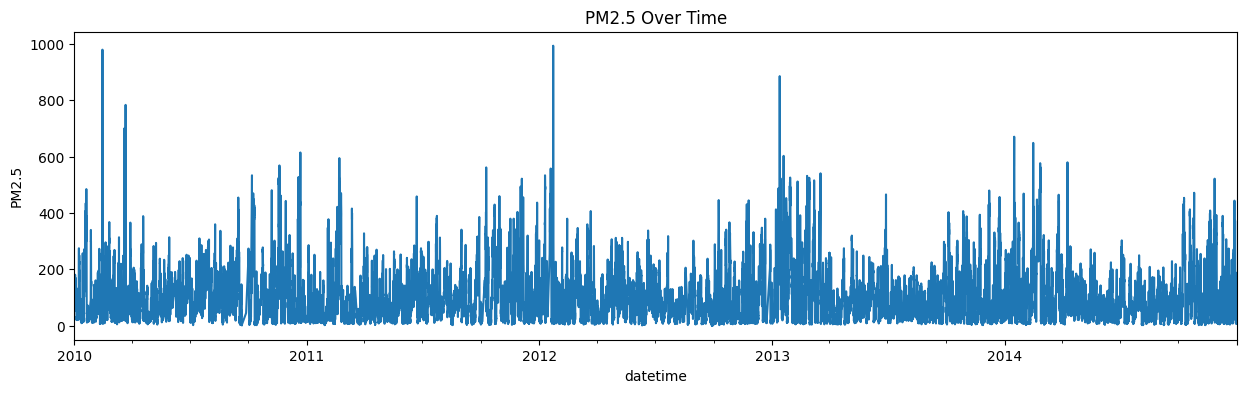

In [9]:
df['pm2.5'].plot(figsize=(15, 4), title='PM2.5 Over Time')
plt.ylabel('PM2.5')
plt.show()


In [11]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'NW'

In [14]:
df_encoded = pd.get_dummies(df, columns=['cbwd'])


In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'NW'

In [16]:
# Interpolate missing PM2.5 values
df['pm2.5'] = df['pm2.5'].interpolate()

# Convert datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# One-hot encode wind direction
df = pd.get_dummies(df, columns=['cbwd'])

# Drop any remaining NaN rows if needed
df.dropna(inplace=True)

# Now you're ready to model or visualize


In [19]:
import pandas as pd

df = pd.read_csv('../data/PRSA_data_2010.1.1-2014.12.31.csv')


# Convert date columns to datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Fill or interpolate missing PM2.5 values
df['pm2.5'] = df['pm2.5'].interpolate()

# Keep only the target variable
series = df['pm2.5']


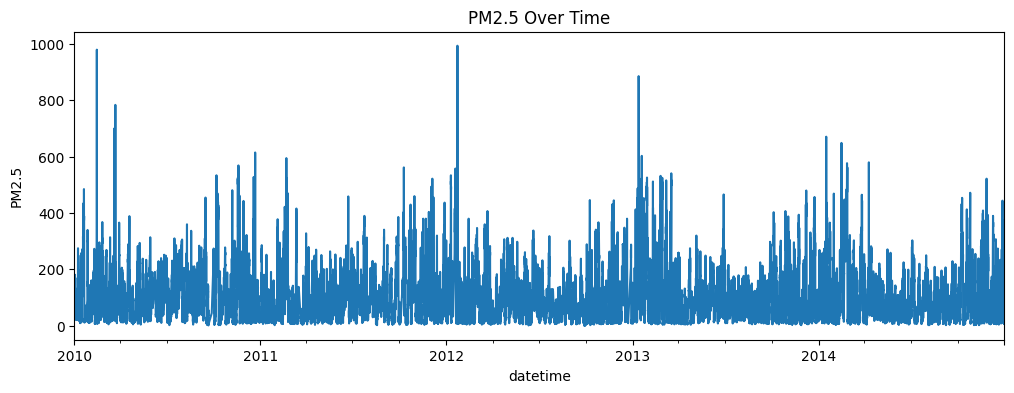

In [20]:
import matplotlib.pyplot as plt

series.plot(figsize=(12, 4), title="PM2.5 Over Time")
plt.ylabel("PM2.5")
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -21.338837790599072
p-value: 0.0


In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Choose ARIMA(p,d,q). Example: (2,1,2) where:
# p = autoregressive terms
# d = differences (use 1 if series is not stationary)
# q = moving average terms

model = ARIMA(series, order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())


c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                43824
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -199512.403
Date:                Sat, 24 May 2025   AIC                         399034.806
Time:                        08:13:09   BIC                         399078.246
Sample:                    01-01-2010   HQIC                        399048.498
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0999      0.006    191.611      0.000       1.089       1.111
ar.L2         -0.1436      0.006    -24.637      0.000      -0.155      -0.132
ma.L1         -0.9374      0.006   -162.937      0.0

In [23]:
forecast = model_fit.forecast(steps=24)
print(forecast)


2015-01-01 00:00:00    16.303674
2015-01-01 01:00:00    20.415109
2015-01-01 02:00:00    24.319314
2015-01-01 03:00:00    28.023191
2015-01-01 04:00:00    31.536483
2015-01-01 05:00:00    34.868917
2015-01-01 06:00:00    38.029788
2015-01-01 07:00:00    41.027930
2015-01-01 08:00:00    43.871718
2015-01-01 09:00:00    46.569100
2015-01-01 10:00:00    49.127612
2015-01-01 11:00:00    51.554405
2015-01-01 12:00:00    53.856259
2015-01-01 13:00:00    56.039608
2015-01-01 14:00:00    58.110551
2015-01-01 15:00:00    60.074875
2015-01-01 16:00:00    61.938071
2015-01-01 17:00:00    63.705344
2015-01-01 18:00:00    65.381632
2015-01-01 19:00:00    66.971620
2015-01-01 20:00:00    68.479751
2015-01-01 21:00:00    69.910239
2015-01-01 22:00:00    71.267081
2015-01-01 23:00:00    72.554069
Freq: h, Name: predicted_mean, dtype: float64


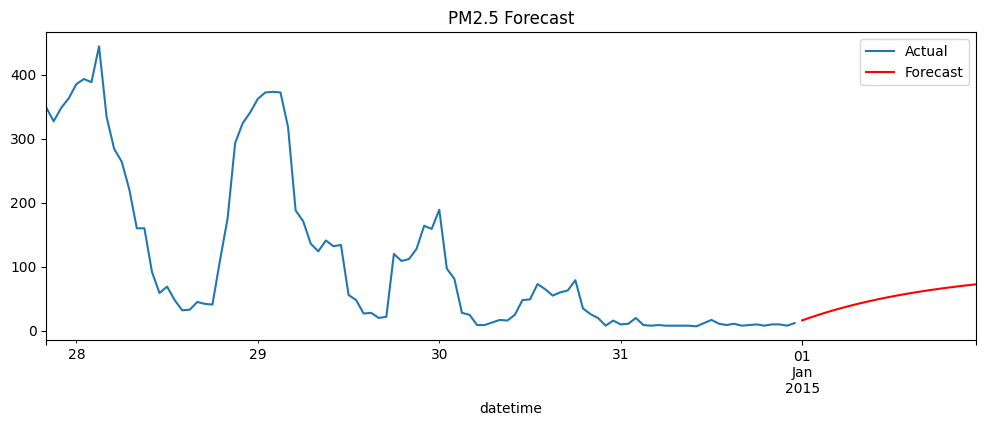

In [24]:
series.tail(100).plot(label="Actual", figsize=(12, 4))
forecast.plot(label="Forecast", color='red')
plt.legend()
plt.title("PM2.5 Forecast")
plt.show()


In [25]:
# Drop rows where 'pm2.5' is missing
df = df.dropna(subset=['pm2.5'])

# Or interpolate
df['pm2.5'] = df['pm2.5'].interpolate()


In [26]:
df = pd.get_dummies(df, columns=['cbwd'])


In [27]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index('datetime')


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [30]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['pm2.5'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=24)  # forecast next 24 hours


c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f'RMSE: {rmse}')


ValueError: Found input variables with inconsistent numbers of samples: [8760, 24]

In [34]:
print(X.shape)
print(y.shape)


NameError: name 'X' is not defined

In [32]:
# Assume your dataframe is 'df' and 'pm2.5' is the target column

# First, define features and target
features = df.drop(columns=['pm2.5'])
target = df['pm2.5']

# Split data by index (for time series, no random split)
split_index = int(len(df) * 0.8)  # 80% train, 20% test

X_train = features[:split_index]
X_test = features[split_index:]

y_train = target[:split_index]
y_test = target[split_index:]


In [18]:
import os
print(os.getcwd())


c:\Users\cw\air-quality-forecasting\notebooks
